# Part II - Ford GoBike System Data Analysis
## by Chinedu Uzorue


## Investigation Overview


> The goal of my presentation is to investigate the impact of several factors on the trip duration of bike rides and communicate explanatory insights gotten from my exploratory data analysis.For the sake of presentation, I trimmed down the number of visualizations to reflect the following key insights:
- Distribution of my variable of interest "trip duration (seconds),
- Next, I check for which gender category have the highest trip duration among the 3 genders
- I also confirmed the member types with  have the longest trip duration of the week
- Lastly, I did some feature engineering to see what age group have the most trip duration

## Dataset Overview

> This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. The dataset contains 183,412 rows and 16 columns. Of the 16 columns, 9 are numerical while 7 are non-numerical. 
8265 entries with no birthyear and/gender in our dataset, representing less than 5% of the entire dataset

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bikes = pd.read_csv('clean_bikes.csv')
bikes.head()

,duration_sec,start_time,end_time,start_station_name,end_station_name,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,start_month,start_weekday,hour,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,Montgomery St BART Station (Market St at 2nd St),Commercial St at Montgomery St,4902,Customer,1984,Male,No,February,3,17,35
1,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,Market St at Dolores St,Powell St BART Station (Market St at 4th St),5905,Customer,1972,Male,No,February,3,12,47
2,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,Grove St at Masonic Ave,Central Ave at Fell St,6638,Subscriber,1989,Other,No,February,3,17,30
3,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,Frank H Ogawa Plaza,10th Ave at E 15th St,4898,Subscriber,1974,Male,Yes,February,3,23,45
4,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,4th St at Mission Bay Blvd S,Broadway at Kearny,5200,Subscriber,1959,Male,No,February,3,23,60


## Distribution of Trip Duration (seconds)
> Plotting on a logarithmic scale, trip duration is right skewed and unimodal, with most of the trips lasting between 0 and 1500 seconds.The peak duration is around 600 seconds recorded by alomst 12,000 trips.

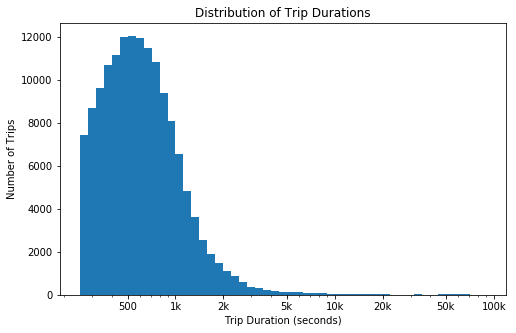

In [3]:
log_binsize = 0.05
bins = 10 ** np.arange(2.4, np.log10(bikes['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = bikes, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4, 5e4, 1e5], [500, '1k', '2k', '5k', '10k', '20k', '50k', '100k'])
plt.xlabel('Trip Duration (seconds)')
plt.ylabel('Number of Trips')
plt.title('Distribution of Trip Durations')
plt.show()

## Effect of Gender on Trip Duration

> "Other" gender members go on the longest trips, regardless of whether they are "Customer" or "Subscriber" user type


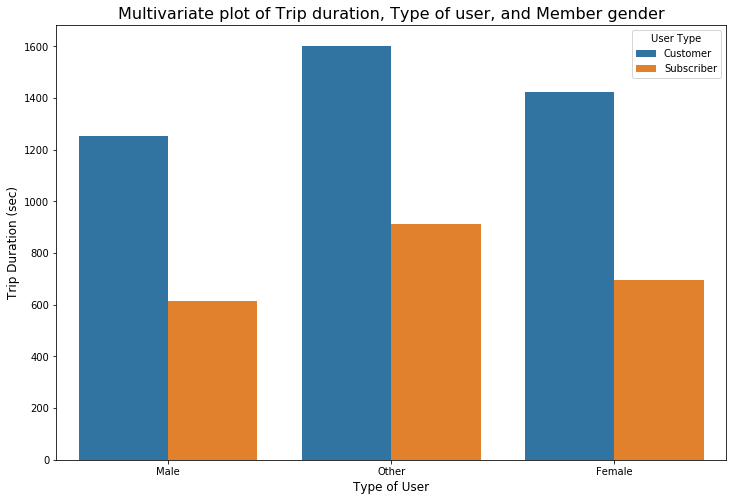

In [4]:
#function to plot barplot
def bpf(x,y,h):
    plt.figure(figsize=[12, 8])
    ax = sb.barplot(x=x, y=y, hue=h, 
                    data=bikes, ci = None)
#Multivariate plot of Trip duration, Type of user, and Member gender
plt.figure(figsize=[12, 8])

#call function to plot bar plot
bpf('member_gender','duration_sec','user_type')

#modify plot labels and title
plt.xlabel('Type of User', fontsize=12)
plt.ylabel('Trip Duration (sec)', fontsize=12)
plt.title('Multivariate plot of Trip duration, Type of user, and Member gender', fontsize=16)
plt.legend(title = 'User Type')
plt.show();

## Week Day with Longest Trips by Member Type

>  "Customer" member types ride  the longest, especially on Sundays

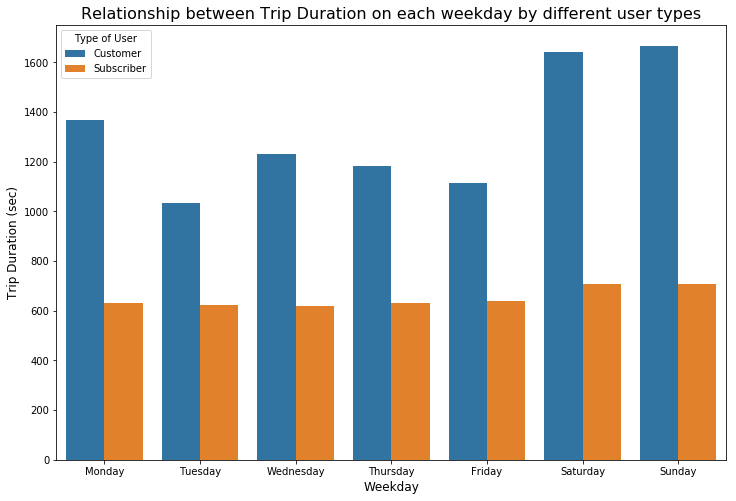

In [5]:
#Plot of Relationship between Trip Duration on each weekday by different user types
plt.figure(figsize=[12, 8])

#call function to plot bar plot
bpf('start_weekday','duration_sec','user_type')

#modify plot labels and title
plt.xlabel('Weekday', fontsize=12)
plt.ylabel('Trip Duration (sec)', fontsize=12)
plt.title('Relationship between Trip Duration on each weekday by different user types', fontsize=16)
plt.xticks([0,1,2,3,4,5,6],['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.legend(title = 'Type of User')
plt.show();

## Effect of Age on Trip Duration

> Members in the age bracket of 20 to 40 have the most trip duration of any age group. With a median age of 32 years, this is not surprising.

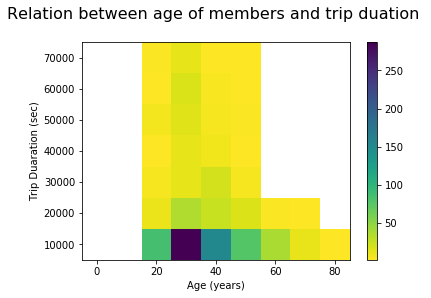

In [6]:
#Plot a heat map to drill down the relationship between age of members and trip duration

bins_x = np.arange(-5, bikes['age'].max()+1, 10)
bins_y = np.arange(5000, bikes['duration_sec'].max()+1, 10000)
plt.hist2d(data = bikes, x = 'age', y = 'duration_sec', bins = [bins_x, bins_y], cmap = 'viridis_r', cmin = 0.5)
plt.colorbar();
plt.xlabel('Age (years)')
plt.ylabel('Trip Duaration (sec)')
plt.title('Relation between age of members and trip duation \n', fontsize=16)
plt.show()